In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

In [25]:
df = pd.read_csv('../insurance_data.csv')
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


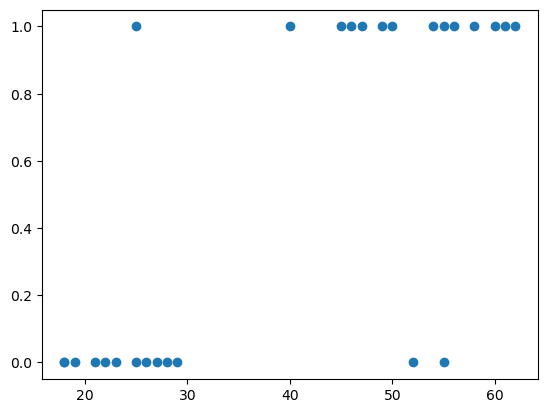

In [4]:
plt.scatter(df.age, df.bought_insurance)

In [93]:
X = df['age']
X = X.to_numpy()
scaler = StandardScaler()
X = X.reshape(X.shape[0], 1)
X = scaler.fit_transform(X)
X = np.hstack([X, np.ones((X.shape[0], 1))])
Y = df['bought_insurance'].to_numpy()
w = np.zeros(X.shape[1])

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [80]:
def gradient_descent(X, Y, w):
    costs = []
    for i in range(10000):
        Y_pred = sigmoid(comp_z(X, w))
        Y_pred = np.clip(Y_pred, 1e-15, 1 - 1e-15)
        cost = -np.mean(Y * np.log(Y_pred) + (1 - Y) * np.log(1 - Y_pred))
        grad_vect = np.dot(X.T, Y_pred - Y) / X.shape[0]
        w = w - 0.0001 * grad_vect
        if (i % 100 == 0):
            ite.append(i)
            costs.append(cost)
            print(cost)
    return w, costs

In [52]:
def comp_z(X, w):
    return np.dot(X, w)

In [94]:
new_w, costs = gradient_descent(X, Y, w)

0.6931471805599451
0.6918079195067052
0.6904753380936027
0.689149402914674
0.6878300806716027
0.6865173381745282
0.6852111423428261
0.683911460205869
0.6826182589037687
0.6813315056880914
0.6800511679225543
0.6787772130837024
0.677509608761561
0.6762483226602712
0.6749933225987017
0.6737445765110434
0.6725020524473806
0.6712657185742473
0.6700355431751583
0.6688114946511264
0.6675935415211567
0.666381652422723
0.6651757961122283
0.663975941465443
0.6627820574779277
0.6615941132654368
0.6604120780643052
0.6592359212318184
0.6580656122465623
0.6569011207087601
0.6557424163405898
0.6545894689864858
0.6534422486134249
0.6523007253111958
0.651164869292652
0.6500346508939516
0.6489100405747783
0.6477910089185502
0.6466775266326126
0.645569564548415
0.6444670936216764
0.6433700849325327
0.6422785096856745
0.6411923392104659
0.6401115449610552
0.6390360985164668
0.6379659715806847
0.6369011359827202
0.6358415636766672
0.634787226741746
0.6337380973823336
0.6326941479279827
0.6316553508334287
0

In [95]:
y_pred = sigmoid(comp_z(X, new_w))
y_pred = (y_pred > 0.5).astype(int)
np.mean(y_pred == Y)

0.8888888888888888

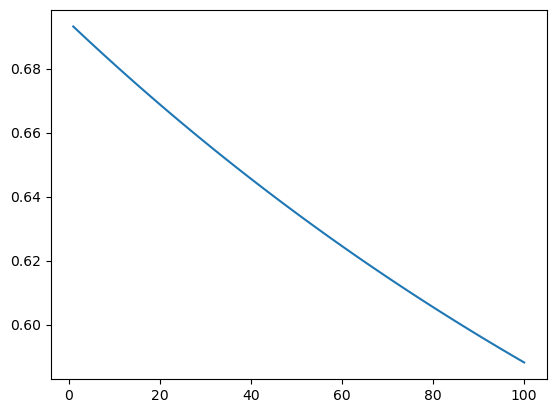

In [96]:
plt.plot(np.arange(1, 101), costs)